## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(
    left=mouse_metadata, 
    right=study_results, 
    on="Mouse ID", 
    how="inner"
)
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(mouse_df)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df.loc[
    mouse_df['Timepoint'] == 0
]['Mouse ID'].value_counts()
mouse_df = mouse_df.loc[mouse_df['Mouse ID'] != "g989"]

In [11]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df)

1880

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# .agg
regimen_df = mouse_df.groupby("Drug Regimen").agg({
"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
# This method is the most straightforward, creating multiple series and putting them all together at the end.
regimen_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
summary_table = mouse_df.describe()
summary_table[["Tumor Volume (mm3)", "Age_months"]]

,Tumor Volume (mm3),Age_months
count,1880.000000,1880.000000
mean,50.435293,12.757979
std,8.914197,7.181998
min,22.050126,1.000000
25%,45.000000,7.000000
50%,48.933454,13.000000
75%,56.324075,19.250000
max,78.567014,24.000000


## Bar Plots

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
grouped_df = mouse_df.groupby(['Drug Regimen']).mean()
grouped_df


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.006757,27.135135,17.060811,52.320930,1.013514
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


Text(0, 0.5, 'Average Tumor Volume')

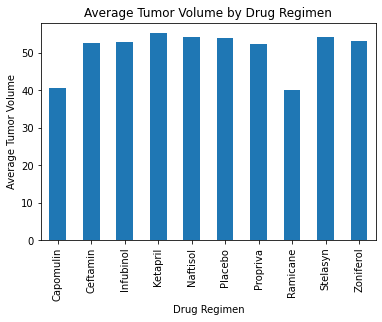

In [260]:
#count_per_time_df.plot.bar()
grouped_df["Tumor Volume (mm3)"].plot.bar(x='Drug Regimen')
plt.title("Average Tumor Volume by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume")

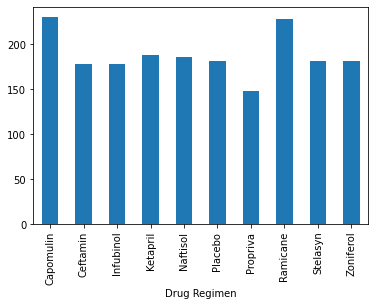

In [265]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
mouse_count =  mouse_df.groupby(['Drug Regimen']).count()
mouse_count["Mouse ID"].plot(kind="bar")
plt.show()

## Pie Plots

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mouse_df.groupby("Sex").count()
gender_df = gender_df.rename(columns={"Mouse ID":"Gender"})
gender_df

,Gender,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


Text(0.5, 1.0, 'Male to Female Ratio')

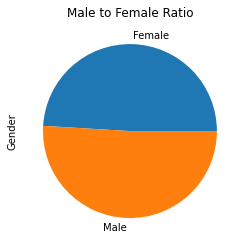

In [43]:
gender_df["Gender"].plot.pie(x='Count')
plt.title("Male to Female Ratio")

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pyplot_gender_df = gender_df["Gender"]

plt.pie(
    pyplot_gender_df,
    autopct="%1.1f%%", 
    shadow=True, 
    startangle=0
)
plt.xlabel('Male')
plt.ylabel('Female')

In [55]:
pyplot_gender_df

Sex
Female    922
Male      958
Name: Gender, dtype: int64

(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

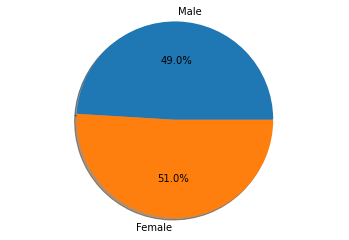

In [63]:
plt.pie(
    pyplot_gender_df, 
    labels=["Male","Female"],
#    title='Ratio of Male to Female Mice',
    autopct="%1.1f%%", 
    shadow=True, 
    startangle=0
)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#iqr for all tumors
quartiles = mouse_tumor.quantile(q=[.25,.5,.75])
quartiles
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

In [102]:
#select the top four regimen by the # of mice that least died
promising_regimen = mouse_df.groupby(['Drug Regimen']).count()
promising_regimen = promising_regimen.sort_values("Tumor Volume (mm3)", ascending=False,)
top_promising_regimen = promising_regimen.head(4)
top_promising_regimen

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ramicane,228,228,228,228,228,228,228
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [132]:
# the last volumne of every mouse in the top four regimens
grouped_last = mouse_df.groupby(['Mouse ID']).last()
grouped_last = grouped_last.set_index("Drug Regimen")
top_regimen_last = grouped_last.loc[['Capomulin','Ramicane', 'Ketapril', 'Naftisol']]
top_regimen_last

,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,
Capomulin,Female,9,22,45,38.982878,2
Capomulin,Male,7,21,45,38.939633,0
Capomulin,Male,16,17,20,30.485985,0
Capomulin,Male,3,19,45,37.074024,1
Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...
Naftisol,Male,13,26,25,53.726101,0
Naftisol,Female,23,25,5,48.475003,1
Naftisol,Female,19,27,5,46.129357,1


In [144]:
capomulin_last = grouped_last.loc[['Capomulin']]
ramicane_last = grouped_last.loc[['Ramicane']]
ketapril_last = grouped_last.loc[['Ketapril']]
naftisol_last = grouped_last.loc[['Naftisol']]

In [146]:
capomulin_volume = capomulin_last["Tumor Volume (mm3)"]
ramicane_volume = ramicane_last["Tumor Volume (mm3)"]
ketapril_volume = ketapril_last["Tumor Volume (mm3)"]
naftisol_volume = naftisol_last["Tumor Volume (mm3)"]

In [147]:
#capomulin qiuartiles
capomulin_quartiles = capomulin_volume.quantile(q=[.25,.5,.75])
cap_lowerq = capomulin_quartiles[0.25]
cap_upperq = capomulin_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower_bound = cap_lowerq - (1.5 * iqr)
cap_upper_bound = cap_upperq + (1.5 * iqr)

In [148]:
#ramicane qiuartiles
ramicane_quartiles = ramicane_volume.quantile(q=[.25,.5,.75])
ram_lowerq = ramicane_quartiles[0.25]
ram_upperq = ramicane_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower_bound = ram_lowerq - (1.5 * iqr)
ram_upper_bound = ram_upperq + (1.5 * iqr)

In [149]:
#ketapril qiuartiles
ketapril_quartiles = ketapril_volume.quantile(q=[.25,.5,.75])
ket_lowerq = ketapril_quartiles[0.25]
ket_upperq = ketapril_quartiles[0.75]
ket_iqr = ket_upperq - ket_lowerq
ket_lower_bound = ket_lowerq - (1.5 * iqr)
ket_upper_bound = ket_upperq + (1.5 * iqr)

In [150]:
#naftisol qiuartiles
naftisol_quartiles = naftisol_volume.quantile(q=[.25,.5,.75])
naf_lowerq = naftisol_quartiles[0.25]
naf_upperq = naftisol_quartiles[0.75]
naf_iqr = naf_upperq - naf_lowerq
naf_lower_bound = naf_lowerq - (1.5 * iqr)
naf_upper_bound = naf_upperq + (1.5 * iqr)

In [135]:
#calcuating quartiles and iqr of the final tumor volumes of each mice which received the top four regimens
tumor_volume = top_regimen_last["Tumor Volume (mm3)"]
quartiles = tumor_volume.quantile(q=[.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

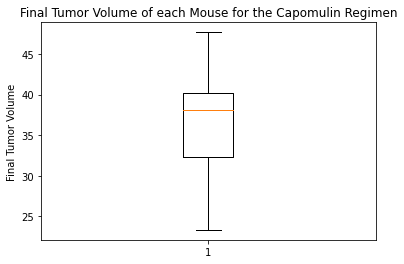

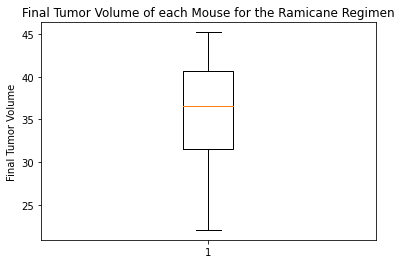

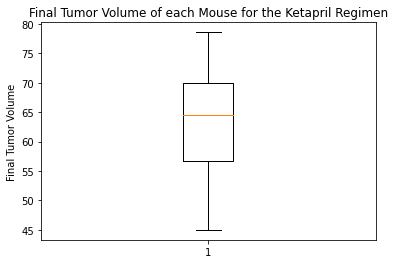

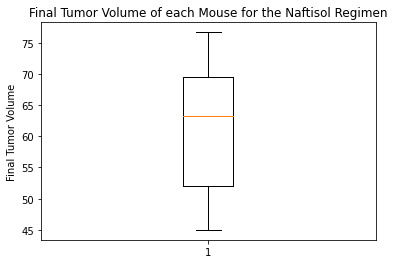

In [157]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#capomulin box plot
plt.title('Final Tumor Volume of each Mouse for the Capomulin Regimen')
plt.ylabel('Final Tumor Volume')
plt.boxplot(x=capomulin_volume)
plt.show()

#ramicane box plot
plt.title('Final Tumor Volume of each Mouse for the Ramicane Regimen')
plt.ylabel('Final Tumor Volume')
plt.boxplot(x=ramicane_volume)
plt.show()

#ketapril box plot
plt.title('Final Tumor Volume of each Mouse for the Ketapril Regimen')
plt.ylabel('Final Tumor Volume')
plt.boxplot(x=ketapril_volume)
plt.show()

#naftisol box plot
plt.title('Final Tumor Volume of each Mouse for the Naftisol Regimen')
plt.ylabel('Final Tumor Volume')
plt.boxplot(x=naftisol_volume)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timestamps')

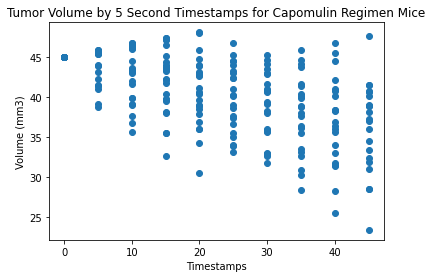

In [211]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
regimen_index = mouse_df.set_index("Drug Regimen")
capomulin_time_volume = regimen_index.loc[['Capomulin']]
capomulin_time_volume = capomulin_time_volume[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]

#plot it
plt.scatter(capomulin_time_volume["Timepoint"], capomulin_time_volume["Tumor Volume (mm3)"])
plt.title("Tumor Volume by 5 Second Timestamps for Capomulin Regimen Mice")
plt.ylabel('Volume (mm3)')
plt.xlabel('Timestamps')

<AxesSubplot:xlabel='Timepoint'>

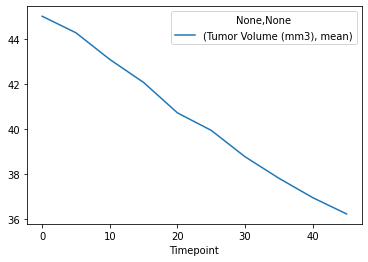

In [208]:
#line plot of the average tumor volume by timepoint for all mice treated with Capomulin
###### Hunter said plotting the average of all mice is fine 
capomulin_time_volume.groupby("Timepoint").agg({
    "Tumor Volume (mm3)": ["mean"]
}).plot(kind="line")

In [193]:
capomulin_time_volume.groupby("Timepoint").mean()
#plt.scatter(capomulin_time_volume["Timepoint"], capomulin_time_volume["Tumor Volume (mm3)"])
cap_avg_vol = capomulin_time_volume["Tumor Volume (mm3)"].mean()

In [225]:
#cap_mouse = capomulin_time_volume.loc[("Mouse ID") == "s185"]
cap_mouse = capomulin_time_volume.head(10)
#first ten rows are mouse s185
cap_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Weight (g)
Drug Regimen,,,,
Capomulin,s185,0,45.000000,17
Capomulin,s185,5,43.878496,17
Capomulin,s185,10,37.614948,17
Capomulin,s185,15,38.177232,17
Capomulin,s185,20,36.866876,17
Capomulin,s185,25,33.949940,17
Capomulin,s185,30,32.959671,17
Capomulin,s185,35,28.328531,17
Capomulin,s185,40,25.472143,17


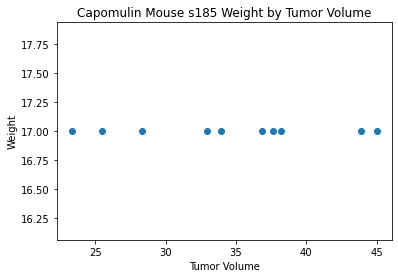

In [228]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


plt.scatter(
    x=cap_mouse.loc[:,"Tumor Volume (mm3)"],
    y=cap_mouse.loc[:,"Weight (g)"]
)
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.title("Capomulin Mouse s185 Weight by Tumor Volume")
plt.show()

## Correlation and Regression

In [239]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [240]:
avg_vol_weight = capomulin_time_volume.groupby("Timepoint").agg({
    "Tumor Volume (mm3)": ["mean"],
    "Weight (g)": ["mean"]
})
avg_vol_weight

,Tumor Volume (mm3),Weight (g)
,mean,mean
Timepoint,,
0,45.000000,20.120000
5,44.266086,20.120000
10,43.084291,20.120000
15,42.064317,20.000000
20,40.716325,19.782609
25,39.939528,19.909091
30,38.769339,19.909091
35,37.816839,19.909091


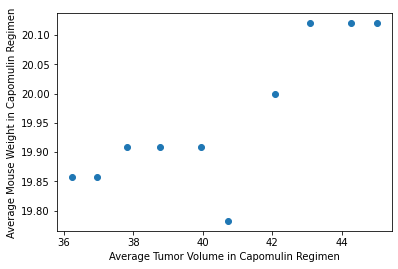

In [241]:
#scatter plot 
plt.scatter(avg_vol_weight["Tumor Volume (mm3)"], avg_vol_weight["Weight (g)"])
plt.ylabel("Average Mouse Weight in Capomulin Regimen")
plt.xlabel("Average Tumor Volume in Capomulin Regimen")
plt.show()

In [276]:
volume["mean"]

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: mean, dtype: float64

In [279]:
volume = avg_vol_weight["Tumor Volume (mm3)"]
weight = avg_vol_weight["Weight (g)"]
correlation = st.pearsonr(volume["mean"],weight["mean"])
correlation

(0.8207292487213749, 0.003617385703547237)